<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>Меры качества кластеризации, уменьшение размерности признаков (практика)</center></h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

try:
    from ipywidgets import interact, IntSlider, fixed, FloatSlider
except ImportError:
    print u'Так надо'

# Качество алгоритмов кластеризации

#### Задание
Запустите метод k-средних для данных ниже, расчитайте меру качества ARI по отношению к истинному разбиению в переменной `y` и меру `silhouette`.

Все должно получится идеально (ну или почти)!

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_samples, silhouette_score

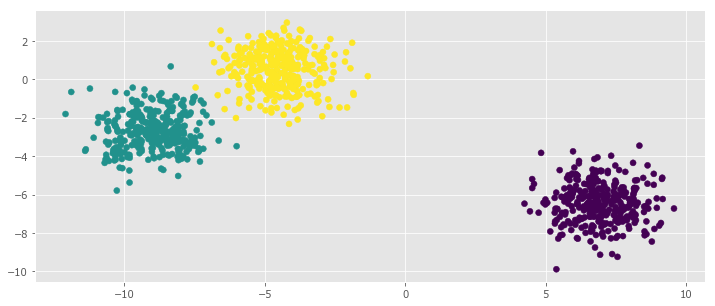

In [32]:
X, y = make_blobs(n_samples=1000, n_features=2,
                  centers=3, random_state=15)
plt.scatter(X[:,0], X[:,1], c=y)

In [33]:
kmeans = KMeans(n_clusters=3
               )
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
labels = kmeans.labels_

In [35]:
pd.crosstab(y, labels)

col_0,0,1,2
row_0,,,
0,0,334,0
1,333,0,0
2,2,0,331


In [36]:
adjusted_rand_score(y, labels)

0.99401205420382321

In [37]:
sil = silhouette_samples(X, labels)

In [38]:
sil.mean()

0.74149317545475291

#### Задание
Давайте чуть-чуть изменим данные.

Попробуем прокластеризовать их с помощью k-means и GMM (EM-алгоритма с гауссовскими распределениями).

Вновь оценим качество с сравнить ARI и `silhouette`.

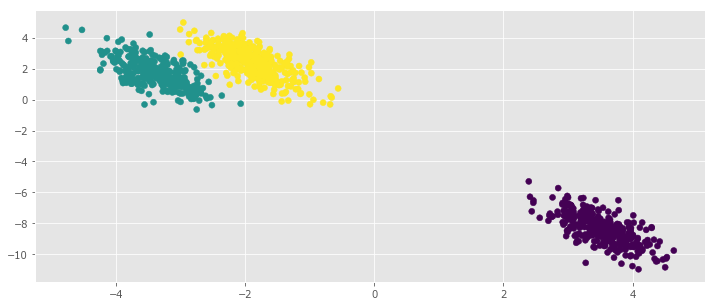

In [39]:
from sklearn.mixture import GaussianMixture
Trans = [[ 0.40834549, -0.43667341],
         [-0.10887718, 0.829]]
X_t = X.dot(Trans)
plt.scatter(X_t[:,0], X_t[:,1], c=y)

In [40]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_t)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

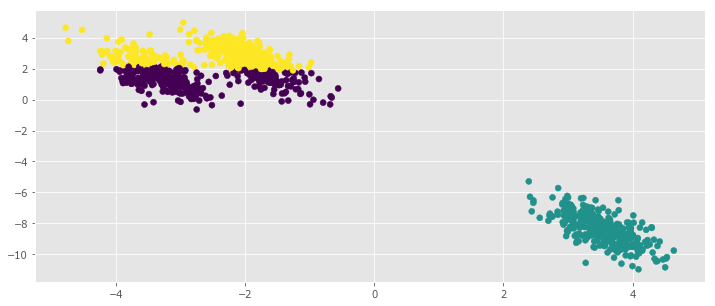

In [42]:
labels = kmeans.labels_
plt.scatter(X_t[:,0], X_t[:,1], c=labels)

In [43]:
gmm = GaussianMixture(n_components=3)
gmm.fit(X_t)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

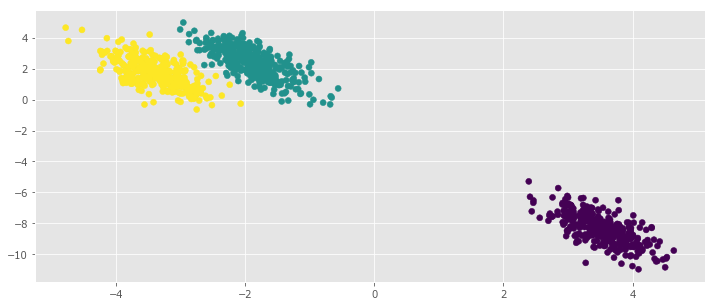

In [44]:
labels = gmm.predict(X_t)
plt.scatter(X_t[:, 0], X_t[:, 1], c=labels)

## Feature Selection

#### Recursive Feature Elimination

In [45]:
def load_otp():
    # Just data load and some preprocessing
    features = pd.read_csv('data/descr.txt', sep='\t', encoding='cp1251', names=['feature', 'descr'])
    
    features = features.iloc[3:]
    feature_names = features.iloc[:, 0].values
    
    df_data_x = pd.read_csv('data/data_x.csv', sep=';', header=None, names=feature_names)
    df_data_x.loc[:, 'PREVIOUS_CARD_NUM_UTILIZED'] = df_data_x.PREVIOUS_CARD_NUM_UTILIZED.fillna(0)
    
    features.loc[:, 'uniq_vals'] = df_data_x.apply(lambda c: c.nunique(), axis=0).values
    
    features = features.reset_index(drop=True)
    
    df_data_y = pd.read_csv('data/data_y.csv', sep=';', names=['active'])
    
    idx = np.where(df_data_x.dtypes == 'object')[0]

    for i in idx:
        df_data_x.iloc[:, i] = df_data_x.iloc[:, i].str.replace(',', '.').astype('float')
        
    df_data = df_data_x.join(df_data_y)
    
    return df_data, features

In [46]:
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, Imputer

In [47]:
df_data, features = load_otp()

In [48]:
X = df_data.iloc[:, :-1].values
y = df_data.iloc[:, -1].values

In [49]:
cv = StratifiedKFold(5, shuffle=True, random_state=123)

In [50]:
pipeline = Pipeline([
    ('imputer', Imputer(strategy='median')),
    ('scaller', StandardScaler()),
    ('clf', RFECV(LogisticRegression(), 
                  verbose=2, cv=cv, scoring='roc_auc', n_jobs=1))
])


In [51]:
pipeline.fit(X, y)

Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 fe

Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('scaller', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RFECV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
   estimator=LogisticRegression(C=1.0, class_weight...0.0001,
          verbose=0, warm_start=False),
   n_jobs=1, scoring='roc_auc', step=1, verbose=2))])

In [52]:
rfe = pipeline.steps[-1][1]

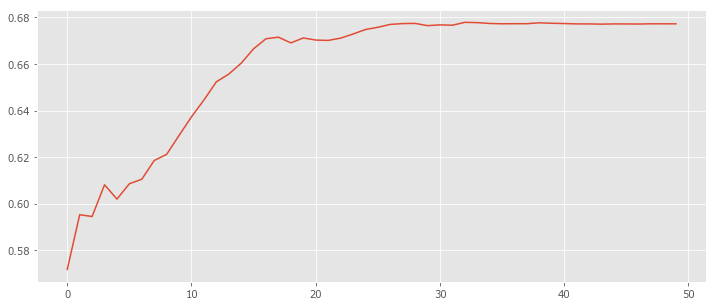

In [53]:
plt.plot(rfe.grid_scores_)

In [55]:
rfe.ranking_

array([ 1,  1,  1, 12,  1, 13,  9,  1,  1, 11,  1,  7, 14,  1,  1,  1,  1,
        1,  6,  1,  1,  1,  1,  8,  1, 16,  5, 17,  1, 10,  1, 15,  4,  1,
        1, 18,  1,  1,  1,  1,  2,  1,  1,  1,  1,  3,  1,  1,  1,  1])

In [54]:
rfe.support_

array([ True,  True,  True, False,  True, False, False,  True,  True,
       False,  True, False, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True, False, False,
       False,  True, False,  True, False, False,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True], dtype=bool)

# Метод главных компонент

Lets try to use PCA on some dataset with various different ways

In [56]:
# Load data
df_wine = pd.read_csv('data/winequality-red.csv', sep=';')

# Make classification target feature
df_wine.loc[:, 'quality_cat'] = (df_wine.quality > 5).astype(int)
df_wine = df_wine.drop('quality', axis=1)

# Get descriptive and target features
X = df_wine.iloc[:, :-1].values
y = df_wine.iloc[:, -1].values

In [57]:
df_wine.columns

Index([u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality_cat'],
      dtype='object')

In [58]:
X

array([[  7.4  ,   0.7  ,   0.   , ...,   3.51 ,   0.56 ,   9.4  ],
       [  7.8  ,   0.88 ,   0.   , ...,   3.2  ,   0.68 ,   9.8  ],
       [  7.8  ,   0.76 ,   0.04 , ...,   3.26 ,   0.65 ,   9.8  ],
       ..., 
       [  6.3  ,   0.51 ,   0.13 , ...,   3.42 ,   0.75 ,  11.   ],
       [  5.9  ,   0.645,   0.12 , ...,   3.57 ,   0.71 ,  10.2  ],
       [  6.   ,   0.31 ,   0.47 , ...,   3.39 ,   0.66 ,  11.   ]])

## PCA через sklearn

In [59]:
from sklearn.decomposition import PCA

In [63]:
pca = PCA(n_components=5)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [64]:
X.shape

(1599, 11)

In [65]:
PC = pca.transform(X)

In [66]:
PC.shape

(1599, 5)

In [68]:
pca.components_ # вектора главных компонент

array([[ -6.13247431e-03,   3.84465551e-04,   1.70902595e-04,
          8.64894648e-03,   6.37307290e-05,   2.18857434e-01,
          9.75678369e-01,   3.72498542e-06,  -2.68008619e-04,
          2.23381730e-04,  -6.35846721e-03],
       [ -2.38994985e-02,  -2.00966661e-03,  -3.03480788e-03,
          1.11348551e-02,  -2.36654751e-04,   9.75265982e-01,
         -2.18916841e-01,  -2.49998510e-05,   3.27182194e-03,
          6.18926046e-04,   1.45642451e-02],
       [  9.53135980e-01,  -2.51315387e-02,   7.37082746e-02,
          2.80913620e-01,   2.94578815e-03,   2.08968395e-02,
         -1.52685886e-03,   7.76139600e-04,  -5.86305467e-02,
          1.75252442e-02,  -4.85991164e-02],
       [ -2.65092214e-01,   7.27374987e-03,  -9.83215158e-03,
          9.43177990e-01,  -6.45262673e-04,  -2.11894371e-02,
         -3.97992967e-03,   5.52088341e-05,   2.05779719e-02,
         -7.19926307e-03,   1.97613982e-01],
       [  9.81476468e-02,  -4.11570558e-02,   4.14815020e-02,
         -1.76

In [69]:
pca.components_.shape

(5, 11)

In [70]:
PC[:10]

array([[-13.22490501,  -2.02389981,  -1.12682053,  -0.39923318,
         -1.08538902],
       [ 22.03772361,   4.40832155,  -0.31037799,  -0.19993774,
         -0.55710939],
       [  7.16267333,  -2.50146086,  -0.5818683 ,  -0.21906928,
         -0.55293355],
       [ 13.43006283,  -1.95112215,   2.63403954,  -1.5740594 ,
         -0.06380573],
       [-13.22490501,  -2.02389981,  -1.12682053,  -0.39923318,
         -1.08538902],
       [ -6.93400027,  -1.38790176,  -1.12127705,  -0.56009974,
         -1.01986846],
       [ 12.03682832,  -3.61177553,  -0.67163691,  -1.00390299,
         -0.75505874],
       [-25.04255804,   4.72607199,  -1.33781652,  -0.94957702,  -0.552435  ],
       [-29.2756982 ,  -0.47905559,  -0.72624845,  -0.28935942,
         -1.11137314],
       [ 54.46316749, -10.99931637,   0.16155938,   3.34519729,
         -0.06094772]])

In [80]:
X_ = ((X - X.mean(axis=0))/X.std(axis=0))

pca = PCA(n_components=5)
pca.fit(X_)

PC = pca.transform(X_)

In [81]:
PC1 = X_.dot(pca.components_.T)

In [82]:
PC1.shape

(1599, 5)

In [83]:
PC1[:10]

array([[ -1.61952988e+00,   4.50950092e-01,  -1.77445415e+00,
          4.37403112e-02,   6.70144808e-02],
       [ -7.99169935e-01,   1.85655306e+00,  -9.11690166e-01,
          5.48065972e-01,  -1.83915612e-02],
       [ -7.48479093e-01,   8.82038861e-01,  -1.17139423e+00,
          4.11020672e-01,  -4.35310068e-02],
       [  2.35767263e+00,  -2.69976009e-01,   2.43488697e-01,
         -9.28449982e-01,  -1.49914907e+00],
       [ -1.61952988e+00,   4.50950092e-01,  -1.77445415e+00,
          4.37403112e-02,   6.70144808e-02],
       [ -1.58370727e+00,   5.69194884e-01,  -1.53828605e+00,
          2.37498875e-02,  -1.10075970e-01],
       [ -1.10146403e+00,   6.08014999e-01,  -1.07591480e+00,
         -3.43959207e-01,  -1.13338236e+00],
       [ -2.24870765e+00,  -4.16834777e-01,  -9.86837186e-01,
         -1.20337942e-03,  -7.80434577e-01],
       [ -1.08688652e+00,  -3.08569495e-01,  -1.51815021e+00,
          3.31490454e-03,  -2.26726629e-01],
       [  6.54789525e-01,   1.6652074

In [84]:
PC[:10]

array([[ -1.61952988e+00,   4.50950092e-01,  -1.77445415e+00,
          4.37403112e-02,   6.70144808e-02],
       [ -7.99169935e-01,   1.85655306e+00,  -9.11690166e-01,
          5.48065972e-01,  -1.83915612e-02],
       [ -7.48479093e-01,   8.82038861e-01,  -1.17139423e+00,
          4.11020672e-01,  -4.35310068e-02],
       [  2.35767263e+00,  -2.69976009e-01,   2.43488697e-01,
         -9.28449982e-01,  -1.49914907e+00],
       [ -1.61952988e+00,   4.50950092e-01,  -1.77445415e+00,
          4.37403112e-02,   6.70144808e-02],
       [ -1.58370727e+00,   5.69194884e-01,  -1.53828605e+00,
          2.37498875e-02,  -1.10075970e-01],
       [ -1.10146403e+00,   6.08014999e-01,  -1.07591480e+00,
         -3.43959207e-01,  -1.13338236e+00],
       [ -2.24870765e+00,  -4.16834777e-01,  -9.86837186e-01,
         -1.20337942e-03,  -7.80434577e-01],
       [ -1.08688652e+00,  -3.08569495e-01,  -1.51815021e+00,
          3.31490454e-03,  -2.26726629e-01],
       [  6.54789525e-01,   1.6652074

## PCA через ковариационную матрицу

In [85]:
from numpy.linalg import eig

In [93]:
C = X_.T.dot(X_)

In [94]:
C.shape

(11, 11)

In [95]:
lmbd, A = eig(C)

In [96]:
lmbd

array([ 4955.51277263,  3079.52959367,  2479.31903855,  1939.95881639,
        1533.90802208,    95.23374076,   289.95173334,   551.08274479,
         676.30776275,   933.48215949,  1054.71361553])

In [97]:
A.shape

(11, 11)

In [98]:
pca.components_

array([[ 0.48931422, -0.23858436,  0.46363166,  0.14610715,  0.21224658,
        -0.03615752,  0.02357485,  0.39535301, -0.43851962,  0.24292133,
        -0.11323206],
       [-0.11050274,  0.27493048, -0.15179136,  0.27208024,  0.14805156,
         0.51356681,  0.56948696,  0.23357549,  0.00671079, -0.03755392,
        -0.38618096],
       [-0.12330157, -0.44996253,  0.23824707,  0.10128338, -0.09261383,
         0.42879287,  0.3224145 , -0.33887135,  0.05769735,  0.27978615,
         0.47167322],
       [-0.22961737,  0.07895978, -0.07941826, -0.37279256,  0.66619476,
        -0.04353782, -0.03457712, -0.17449976, -0.00378775,  0.55087236,
        -0.12218109],
       [-0.08261366,  0.21873452, -0.05857268,  0.73214429,  0.2465009 ,
        -0.15915198, -0.22246456,  0.15707671,  0.26752977,  0.22596222,
         0.35068141]])

In [101]:
A = A.T[:5]

In [104]:
PC_eig = X_.dot(A.T)

In [105]:
PC_eig[:10]

array([[ -1.61952988e+00,   4.50950092e-01,  -1.77445415e+00,
          4.37403112e-02,   6.70144808e-02],
       [ -7.99169935e-01,   1.85655306e+00,  -9.11690166e-01,
          5.48065972e-01,  -1.83915612e-02],
       [ -7.48479093e-01,   8.82038861e-01,  -1.17139423e+00,
          4.11020672e-01,  -4.35310068e-02],
       [  2.35767263e+00,  -2.69976009e-01,   2.43488697e-01,
         -9.28449982e-01,  -1.49914907e+00],
       [ -1.61952988e+00,   4.50950092e-01,  -1.77445415e+00,
          4.37403112e-02,   6.70144808e-02],
       [ -1.58370727e+00,   5.69194884e-01,  -1.53828605e+00,
          2.37498875e-02,  -1.10075970e-01],
       [ -1.10146403e+00,   6.08014999e-01,  -1.07591480e+00,
         -3.43959207e-01,  -1.13338236e+00],
       [ -2.24870765e+00,  -4.16834777e-01,  -9.86837186e-01,
         -1.20337942e-03,  -7.80434577e-01],
       [ -1.08688652e+00,  -3.08569495e-01,  -1.51815021e+00,
          3.31490454e-03,  -2.26726629e-01],
       [  6.54789525e-01,   1.6652074

In [106]:
PC[:10]

array([[ -1.61952988e+00,   4.50950092e-01,  -1.77445415e+00,
          4.37403112e-02,   6.70144808e-02],
       [ -7.99169935e-01,   1.85655306e+00,  -9.11690166e-01,
          5.48065972e-01,  -1.83915612e-02],
       [ -7.48479093e-01,   8.82038861e-01,  -1.17139423e+00,
          4.11020672e-01,  -4.35310068e-02],
       [  2.35767263e+00,  -2.69976009e-01,   2.43488697e-01,
         -9.28449982e-01,  -1.49914907e+00],
       [ -1.61952988e+00,   4.50950092e-01,  -1.77445415e+00,
          4.37403112e-02,   6.70144808e-02],
       [ -1.58370727e+00,   5.69194884e-01,  -1.53828605e+00,
          2.37498875e-02,  -1.10075970e-01],
       [ -1.10146403e+00,   6.08014999e-01,  -1.07591480e+00,
         -3.43959207e-01,  -1.13338236e+00],
       [ -2.24870765e+00,  -4.16834777e-01,  -9.86837186e-01,
         -1.20337942e-03,  -7.80434577e-01],
       [ -1.08688652e+00,  -3.08569495e-01,  -1.51815021e+00,
          3.31490454e-03,  -2.26726629e-01],
       [  6.54789525e-01,   1.6652074

In [118]:
pca.explained_variance_ratio_

array([ 0.28173931,  0.1750827 ,  0.1409585 ,  0.11029387,  0.08720837])

In [119]:
lmbd/lmbd.sum()

array([ 0.28173931,  0.1750827 ,  0.1409585 ,  0.11029387,  0.08720837,
        0.00541439,  0.01648483,  0.0313311 ,  0.03845061,  0.05307193,
        0.05996439])

## Оценка качества при разных количества компонент

Реализуйте 2 пайплайнк:
    * StandartScaler + LogisticRegression
    * StandartScaler + PCA + LogisticRegression

Оцените качество пайплайна с PCA при разных количествах компонент и сравните его с первым

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [108]:
pipeline1 = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

pipeline2 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('clf', LogisticRegression())
])

In [111]:
cv = StratifiedKFold(n_splits=5, random_state=123)
score_base = cross_val_score(pipeline1, X, y, cv=cv).mean()

In [114]:
scores_pca = []
comp_range = range(1, 12)
for c in comp_range:
    pipeline2 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=c)),
    ('clf', LogisticRegression())
    ])
    
    scores_pca.append(cross_val_score(pipeline2, X, y, cv=cv).mean())

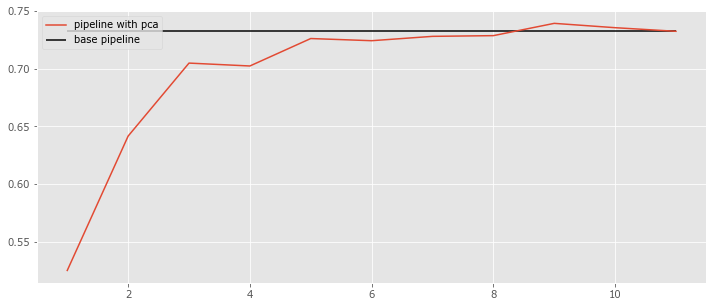

In [117]:
plt.plot(comp_range, scores_pca, label='pipeline with pca')
plt.hlines(score_base, comp_range[0], comp_range[-1], label='base pipeline')
plt.legend()

# T-SNE

#### Задание
Выполните многомерное шкалирование данных с цифрами с помощью tsne.

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
## Your Code Here